<a href="https://colab.research.google.com/github/abhiWriteCode/Small-Machine-Learning-Projects/blob/master/cifar10/CIFAR10_using_resnet18%2C_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install 'torch==0.4.0'
!pip3 install 'torchvision==0.2.1'
!pip3 install --no-cache-dir -I 'pillow==5.1.0'
!pip install torchsummary


# Restart Kernel
# This workaround is needed to properly upgrade PIL on Google Colab.
import os
os._exit(00)

    100% |████████████████████████████████| 2.0MB 3.1MB/s 


In [0]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import datasets, transforms
%matplotlib inline

In [2]:
mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
batch_size = 8

transform_train = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std)])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


transform_test = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean, std)])

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.shape

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

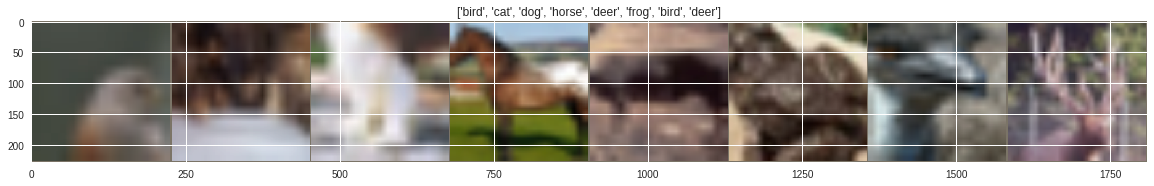

In [4]:
# Make a grid from batch
out = torchvision.utils.make_grid(images)
plt.figure(figsize=(20, 6))
imshow(out, title=[classes[x] for x in labels])

In [5]:
import torch.nn as nn
import torch.nn.functional  as F

model = torchvision.models.resnet18(pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

In [7]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [8]:
from collections import OrderedDict

in_features = model.fc.in_features

custom_fc = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(in_features, 256)),
                          ('relu1', nn.ReLU()),
                          ('fc2', nn.Linear(256, 84)),
                          ('relu2', nn.ReLU()),
                          ('fc3', nn.Linear(84, 32)),
                          ('relu3', nn.ReLU()),
                          ('output', nn.Linear(32, 10))]))
    
model.fc = custom_fc

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

if device.type == 'cuda':
  print('Thanks google')
  
_ = model.to(device)

cuda
Thanks google


In [10]:
from torchsummary import summary

summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [0]:
def train(model, criterion, optimizer, scheduler, epochs=20):
  print('Training started')
  train_losses, test_losses = [], []
  
  for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:

      images, labels = images.to(device), labels.to(device)

      optimizer.zero_grad()

      ps = model(images)
      loss = criterion(ps, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()

    else:
      test_loss = 0
      accuracy = 0

      # Turn off gradients for validation, saves memory and computations
      with torch.no_grad():
        model.eval()
        for images, labels in testloader:
          
          images, labels = images.to(device), labels.to(device)
            
          ps = model(images)
          test_loss += criterion(ps, labels)
          
          top_p, top_class = ps.topk(1, dim=1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.cuda.FloatTensor))
      
      scheduler.step()
      model.train()

      train_losses.append(running_loss/len(trainloader))
      test_losses.append(test_loss/len(testloader))

      print("Epoch: {}/{}.. ".format(e+1, epochs),
            "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
            "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
      
  print('Finished training')
  return model, train_losses, test_losses

In [0]:
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.005) # backprop only in last-layer

# Decay LR by a factor of 0.1 every 1 epochs
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

In [16]:
%%time
model, train_losses, test_losses = train(model, criterion, optimizer, exp_lr_scheduler, epochs=3)

Training started
Epoch: 1/3..  Training Loss: 1.814..  Test Loss: 1.072..  Test Accuracy: 0.613
Epoch: 2/3..  Training Loss: 1.425..  Test Loss: 0.883..  Test Accuracy: 0.692
Epoch: 3/3..  Training Loss: 1.349..  Test Loss: 0.780..  Test Accuracy: 0.731
Finished training
CPU times: user 8min 32s, sys: 3min 50s, total: 12min 22s
Wall time: 12min 43s


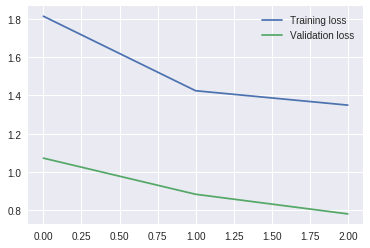

In [17]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

plt.show()